In [9]:
import src.dataset.tensorflow as dataset
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
train_ds, _ = dataset.get_raw_dataset(False)


Using custom data configuration default
Reusing dataset tf_col (C:\Users\Juanj\.cache\huggingface\datasets\tf_col\default\1.0.0\0c616218d5e0a194334e0ed0adacd86ab9b315ec6b03a8b388dece024753def2)
100%|██████████| 2/2 [00:00<00:00, 222.31it/s]
d:\tensorflowers\tensorflower\lib\site-packages\datasets\formatting\formatting.py:167: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(array, copy=False, **self.np_array_kwargs)


In [12]:
it = iter(train_ds)
next(it)[1]['lat']

<tf.Tensor: shape=(), dtype=float32, numpy=6.250013>

In [13]:
lats = []
longs = []
labels = []
for ex in train_ds.as_numpy_iterator():
    lats.append(ex[1]['lat'])
    longs.append(ex[1]['lon'])
    labels.append(ex[2])

In [20]:
spatial_df = pd.DataFrame({'lat':lats, 'lon':longs, 'label':labels})
amount_of_labels = spatial_df['label'].apply(lambda x: len(x))
spatial_df = spatial_df.explode('label')
spatial_df.head()

,lat,lon,label
0,6.250013,-75.595688,17
1,4.597080,-74.079765,9
1,4.597080,-74.079765,0
2,7.116924,-73.128120,5
3,7.129667,-73.112076,5


In [16]:
spatial_df.explode('label').head(10)

,lat,lon,label
0,6.250013,-75.595688,17
1,4.597080,-74.079765,9
1,4.597080,-74.079765,0
2,7.116924,-73.128120,5
3,7.129667,-73.112076,5
4,4.598717,-74.078781,13
5,6.255044,-75.562042,5
6,4.681217,-74.049644,7
7,6.249551,-75.591042,16
8,6.260261,-75.564415,14


In [23]:
amount_of_labels.value_counts()

1    1906
2      88
3       5
4       1
Name: label, dtype: int64

Casi todas las imágenes traen una sola etiqueta, 4.4% tienen dos, y <1% tienen 3 o más

In [27]:
label_dict = {0:"supermercado",
        1:"talleres carros/motos",
        2:"parqueadero",
        3:"tienda",
        4:"carnicería/fruver",
        5:"licorera",
        6:"electrónica/cómputo",
        7:"ferretería",
        8:"muebles/tapicería",
        9:"electrodomésticos",
        10:"deporte",
        11:"ropa",
        12:"zapatería",
        13:"farmacia", 
        14:"puesto móvil/toldito",
        15:"hotel",
        16:"café/restaurante",
        17:"bar", 
        18:"belleza/barbería/peluquería",
        19:"animales"
        }
spatial_df['label_str']=spatial_df['label'].apply(lambda x: label_dict[x])
spatial_df['label_str'].value_counts()

licorera                       476
farmacia                       210
carnicería/fruver              206
café/restaurante               191
muebles/tapicería              150
supermercado                   142
tienda                          92
puesto móvil/toldito            86
ferretería                      79
parqueadero                     78
electrodomésticos               60
belleza/barbería/peluquería     59
animales                        56
electrónica/cómputo             54
ropa                            46
deporte                         35
bar                             28
zapatería                       19
talleres carros/motos           19
hotel                           15
Name: label_str, dtype: int64

Lo que más está presente son licoreras, que representan un ~24% del total de las etiquetas. Le siguen farmacias y carnicerías/fruvers, ambas con ~10%, y cafés/restaurantes, con 9.5%. Las etiquetas que menos hay son hoteles (0.75%), talleres y zapaterías (1%) y bares (1.5%). De la cantidad tan baja de bares y alta de licoreras, sospecho que hay un sobrelapamiento en ambas, que tiende a caer en licoreras

<AxesSubplot:xlabel='lat', ylabel='lon'>

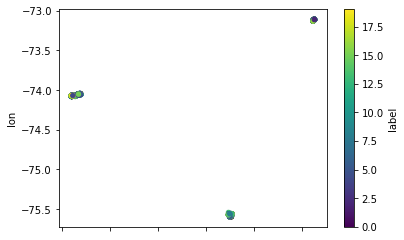

In [19]:
spatial_df.plot.scatter(x='lat', y='lon', c='label', colormap='viridis')

Hay tres grupos dentro de las coordenadas, o sea que al final tenemos tres ciudades